In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

df = pd.read_csv("/content/CAvideos.csv")

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


In [3]:
df['trending_date'] = pd.to_datetime(df['trending_date'],format="%y.%d.%m")
df['publish_time'] = pd.to_datetime(df['publish_time'])

In [4]:
df['publish_day'] = df['publish_time'].dt.day_name()
df['publish_hour'] = df['publish_time'].dt.hour
df['publish_month'] = df['publish_time'].dt.month_name()


In [6]:
df['publish_time'] = df['publish_time'].dt.tz_localize(None)
df['days_to_trend'] = (df['trending_date']-df['publish_time'].dt.normalize()).dt.days


In [7]:
df['comments_disabled'] = df['comments_disabled'].astype(int)
df['ratings_disabled'] = df['ratings_disabled'].astype(int)


In [9]:
df['tags'] = df['tags'].str.replace('"','').str.lower()
df['title']=df['title'].str.strip()

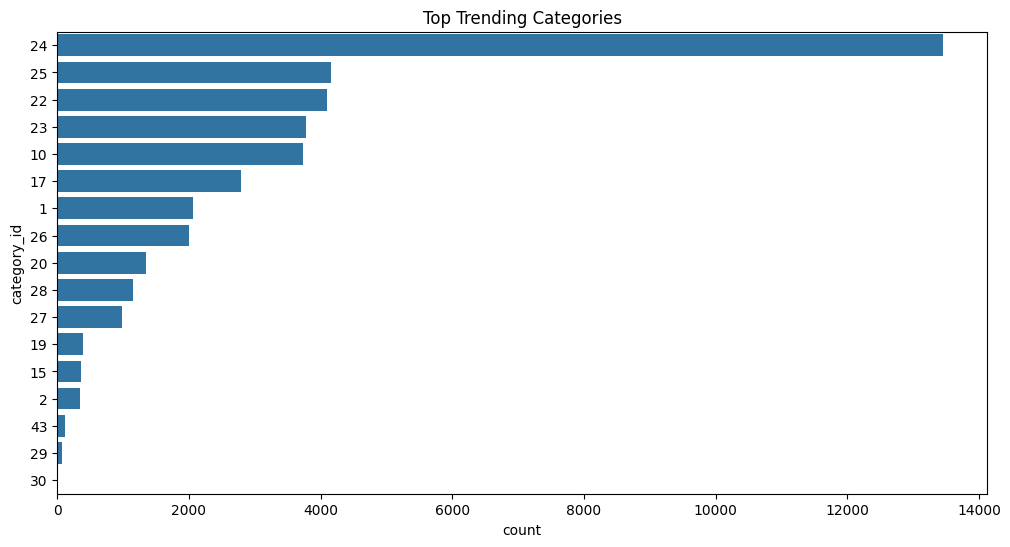

In [10]:
#Top Trending Categories
plt.figure(figsize=(12,6))
sns.countplot(data=df,y='category_id',order=df['category_id'].value_counts().index)
plt.title("Top Trending Categories")
plt.show()

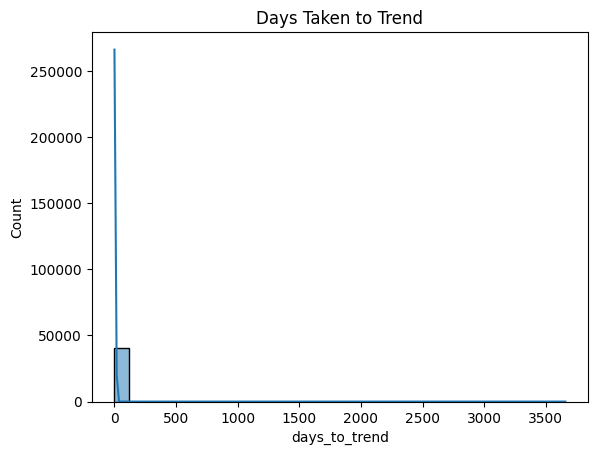

In [11]:
#Days taken to  Trend

sns.histplot(df['days_to_trend'].dropna(),bins=30,kde=True)
plt.title('Days Taken to Trend')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

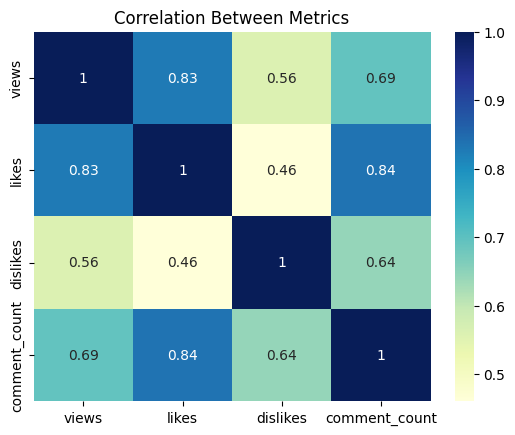

In [19]:
#Correlation between metrics

numeric_cols = ['views','likes','dislikes','comment_count']
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='viridis')
plt.title('Correlation Between Metrics')
plt.show

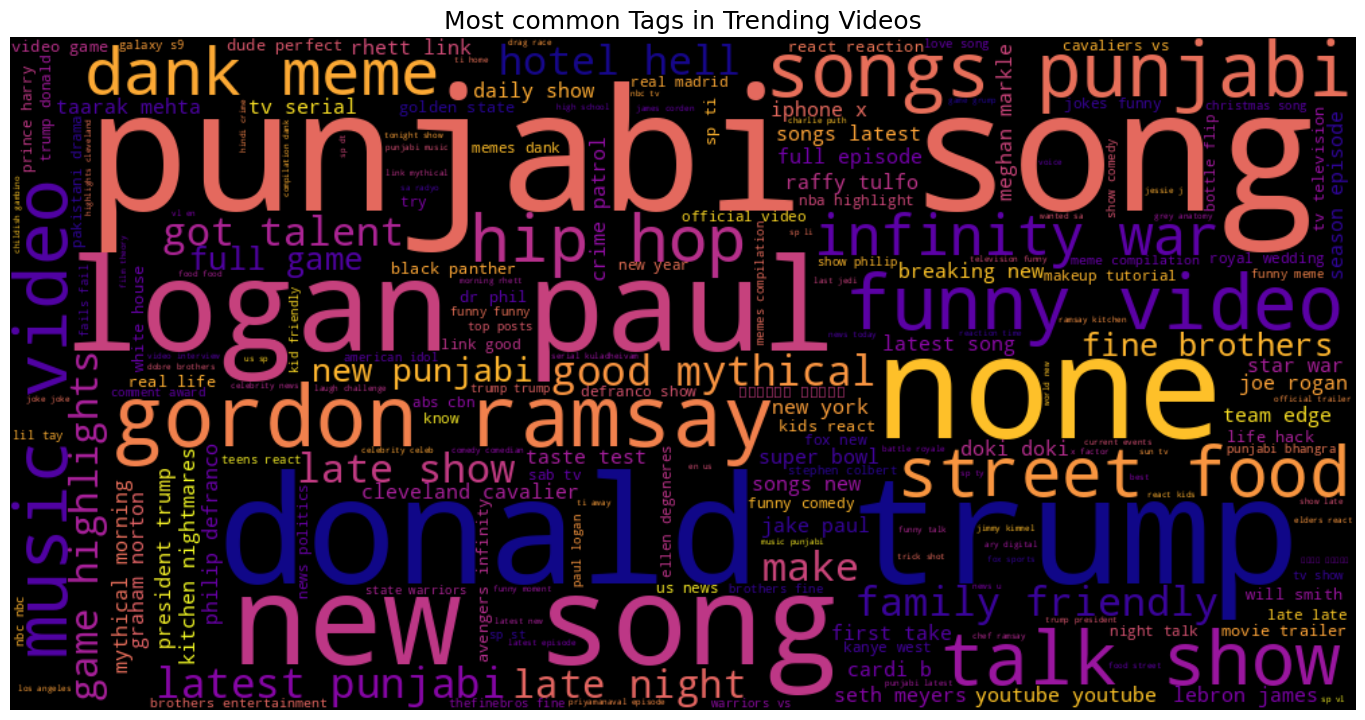

In [22]:
# Most common tags in Trending Videos

from wordcloud import WordCloud, STOPWORDS

#replaces pipe delimeter with space
tags= df['tags'].str.replace('|',' ',regex=False).str.lower()
all_tags = ''.join(tags.dropna())



# worldcloud init

wordcloud = WordCloud(width=1000,height = 500, background_color= 'black', stopwords=STOPWORDS,colormap='plasma').generate(all_tags)


#plotting

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Most common Tags in Trending Videos', fontsize=18)
plt.tight_layout(pad=0)
plt.show()


/tmp/ipython-input-26-2985221570.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels.values,y=top_channels.index,palette='coolwarm')


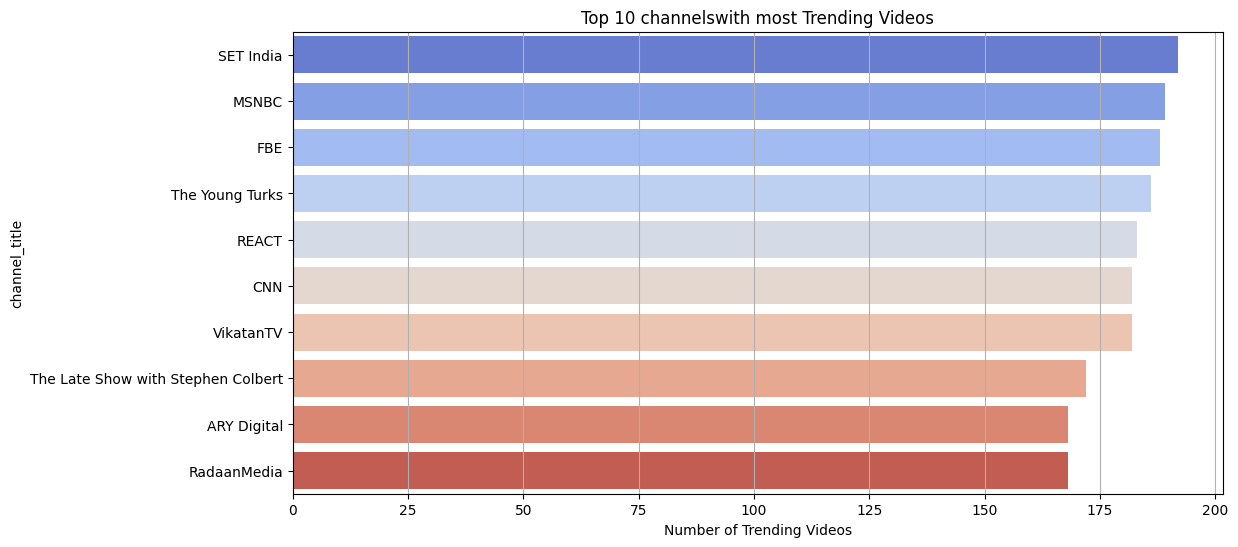

In [26]:
top_channels= df['channel_title'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_channels.values,y=top_channels.index,palette='coolwarm')
plt.title('Top 10 channelswith most Trending Videos')
plt.xlabel("Number of Trending Videos")
plt.grid(True,axis='x')
plt.show()

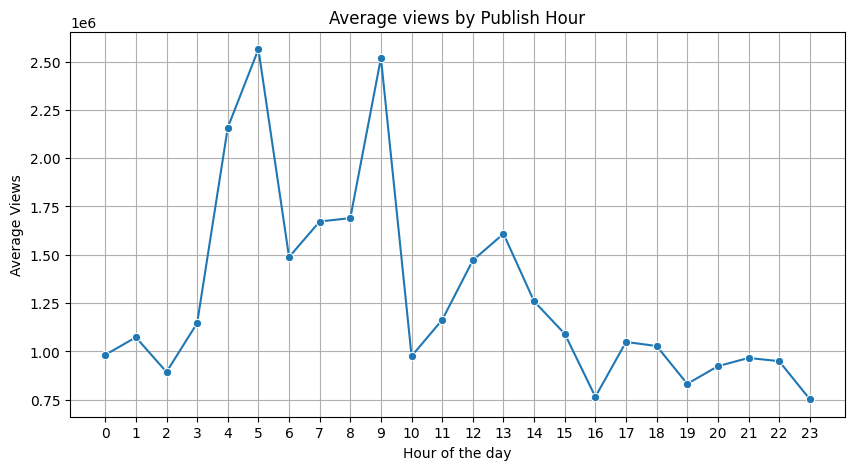

In [28]:
publish_hour_views = df.groupby('publish_hour')['views'].mean()


plt.figure(figsize=(10,5))
sns.lineplot(x=publish_hour_views.index,y=publish_hour_views.values,marker='o')
plt.title('Average views by Publish Hour')
plt.xlabel("Hour of the day")
plt.ylabel("Average Views")
plt.grid(True)
plt.xticks(range(0,24))
plt.show()

In [31]:
import json

with open('/content/CA_category_id.json') as f:
  data = json.load(f)


#build Mapping
category_mapping  = {}
for item in data['items']:
  category_mapping[int(item['id'])]=item['snippet']['title']


# Map it to df
df['category_name'] = df['category_id'].map(category_mapping)



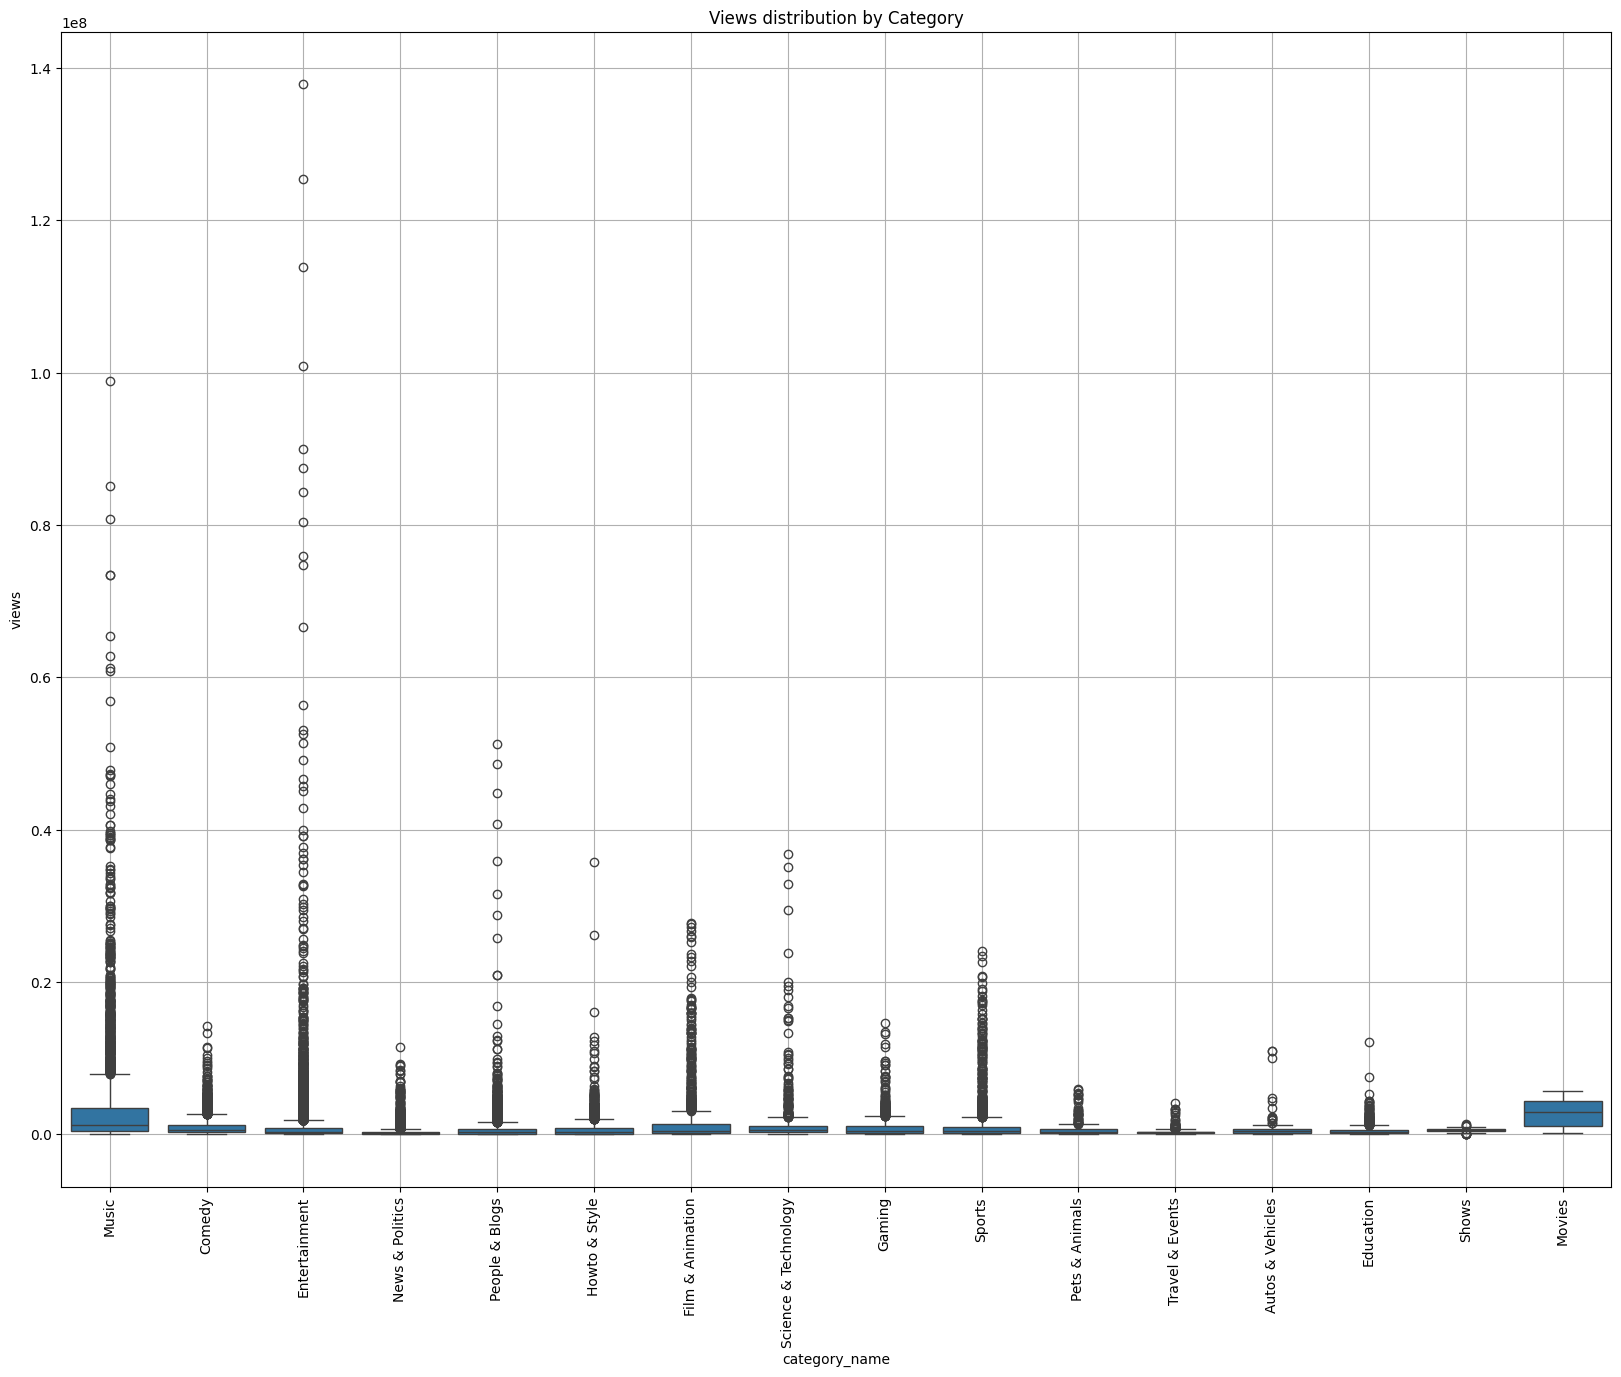

In [49]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df,x='category_name',y='views')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('Views distribution by Category')
plt.show()

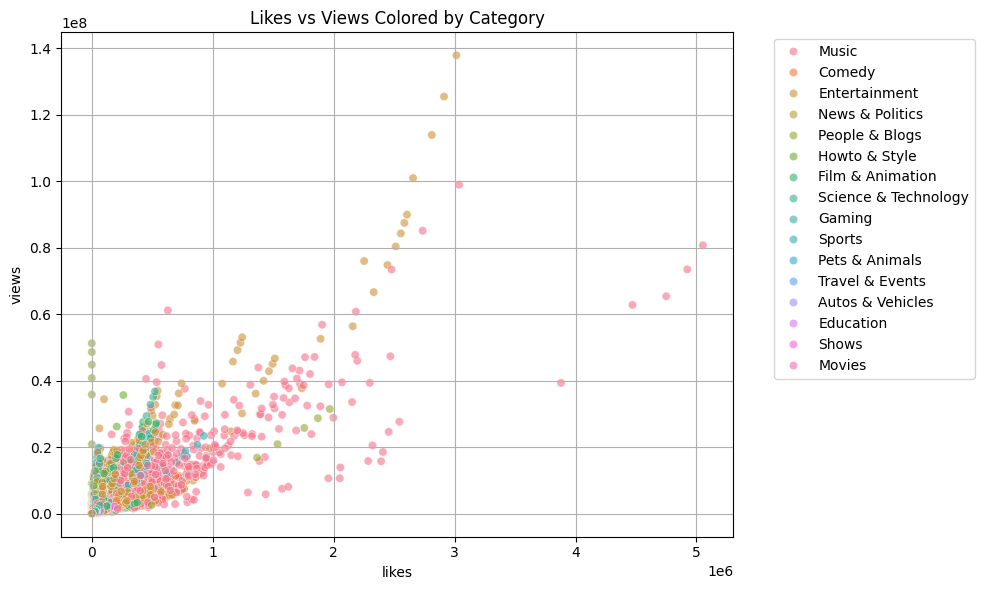

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='likes',y='views',hue='category_name',alpha=0.6)
plt.title('Likes vs Views Colored by Category')
plt.xlabel('likes')
plt.ylabel('views')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
assets/